# Laboratorio 7. Predicción de datos con AutoGluon



Se estará usando una base de datos de diabetes, con la siguiente distribuición 
Columnas en el archivo diabetes.csv
* Pregnancies:  Número de veces que ha estado embarazada
* GlucosePlasma:  Concentración de glucosa
* BloodPressure:  Presión de sangre diastólica (mm Hg)
* Skin:  Grosor del pliegue cutáneo del Triscep (mm)
* Insulin:  Suero de insulina 2-Horas (mu U/ml)
* BMI:  Indice de masa corporal (peso en Kg/(estatura en mts)2)
* DiabetesPedigreeFunction:  Función de pedigree de diabetes
* Age:  Edad en años
* Outcome:  Diabetes ó no diabetes (0 ó 1)

## Análisis Exploratorio 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Configuración para visualizaciones
plt.style.use('default')
sns.set_palette("husl")

# Cargar datos
df = pd.read_csv("./diabetes.csv")

In [4]:
print("=" * 60)
print("ANÁLISIS EXPLORATORIO DE DATOS - DATASET DIABETES")
print("=" * 60)

# 1. INFORMACIÓN BÁSICA DEL DATASET
print("\n1. INFORMACIÓN BÁSICA DEL DATASET")
print("-" * 40)
print(f"Forma del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]}")
print(f"Número de columnas: {df.shape[1]}")

print("\nTipos de datos:")
print(df.dtypes)

print("\nPrimeras 5 filas:")
print(df.head())



ANÁLISIS EXPLORATORIO DE DATOS - DATASET DIABETES

1. INFORMACIÓN BÁSICA DEL DATASET
----------------------------------------
Forma del dataset: (768, 9)
Número de filas: 768
Número de columnas: 9

Tipos de datos:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

Primeras 5 filas:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1 

In [5]:
# 2. ESTADÍSTICAS DESCRIPTIVAS
print("\n\n2. ESTADÍSTICAS DESCRIPTIVAS")
print("-" * 40)
print(df.describe())



2. ESTADÍSTICAS DESCRIPTIVAS
----------------------------------------
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                

In [6]:
# 3. VERIFICACIÓN DE VALORES NULOS
print("\n\n3. VALORES NULOS")
print("-" * 40)
valores_nulos = df.isnull().sum()
print("Valores nulos por columna:")
print(valores_nulos)

if valores_nulos.sum() == 0:
    print(" No hay valores nulos en el dataset")
else:
    print("Se encontraron valores nulos")



3. VALORES NULOS
----------------------------------------
Valores nulos por columna:
Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64
 No hay valores nulos en el dataset


In [10]:
# 4. VERIFICACIÓN DE VALORES CERO (POSIBLES VALORES ATÍPICOS)
print("\n\n4. VALORES CERO (POSIBLES ATÍPICOS)")
print("-" * 40)
# Columnas donde 0 podría ser un valor atípico
columnas_cero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columnas_cero:
    ceros = (df[col] == 0).sum()
    print(f"{col}: {ceros} valores cero ({ceros/len(df)*100:.1f}%)")

# 4.1. ANÁLISIS DE BALANCE DE CLASES
print("\n\n5. BALANCE DE CLASES (OUTCOME)")
print("-" * 40)
conteo_clases = df['Outcome'].value_counts()
print("Distribución de clases:")
print(conteo_clases)

porcentajes = df['Outcome'].value_counts(normalize=True) * 100
print("\nPorcentajes:")
for clase, porcentaje in porcentajes.items():
    etiqueta = "No Diabetes" if clase == 0 else "Diabetes"
    print(f"{etiqueta} (Clase {clase}): {porcentaje:.1f}%")




4. VALORES CERO (POSIBLES ATÍPICOS)
----------------------------------------
Glucose: 5 valores cero (0.7%)
BloodPressure: 35 valores cero (4.6%)
SkinThickness: 227 valores cero (29.6%)
Insulin: 374 valores cero (48.7%)
BMI: 11 valores cero (1.4%)


5. BALANCE DE CLASES (OUTCOME)
----------------------------------------
Distribución de clases:
Outcome
0    500
1    268
Name: count, dtype: int64

Porcentajes:
No Diabetes (Clase 0): 65.1%
Diabetes (Clase 1): 34.9%




6. GENERANDO VISUALIZACIONES...
----------------------------------------


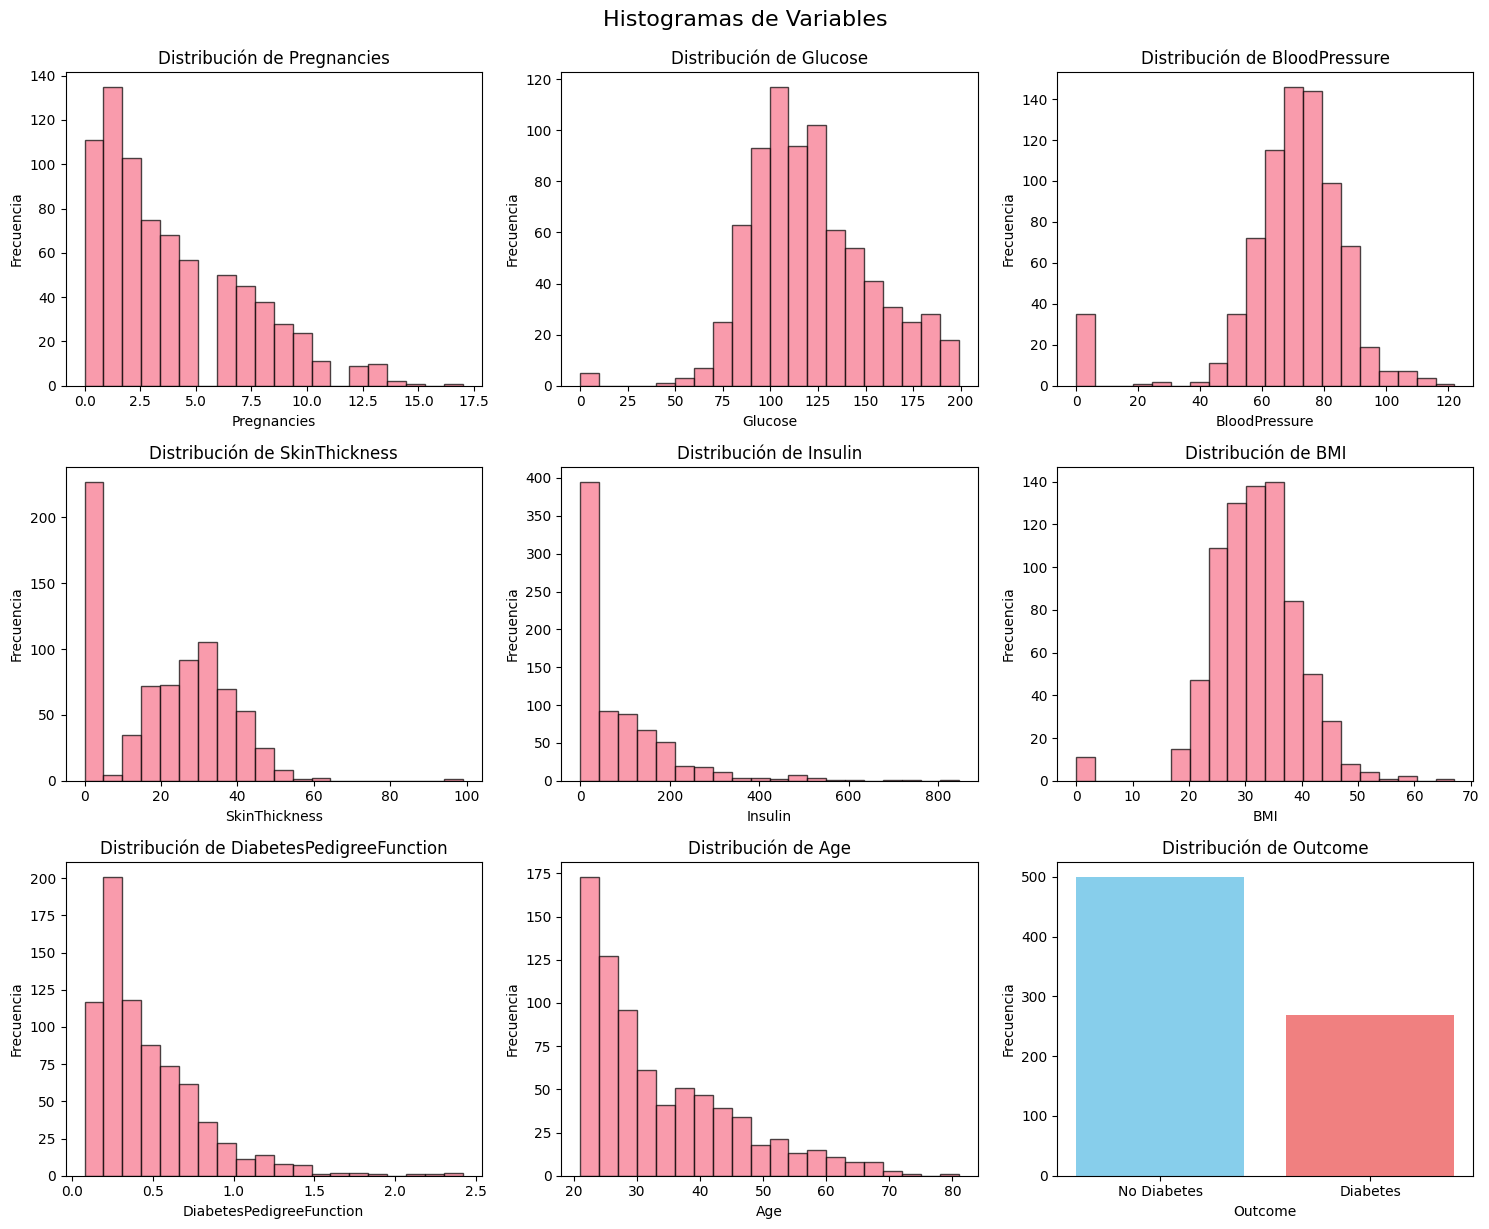

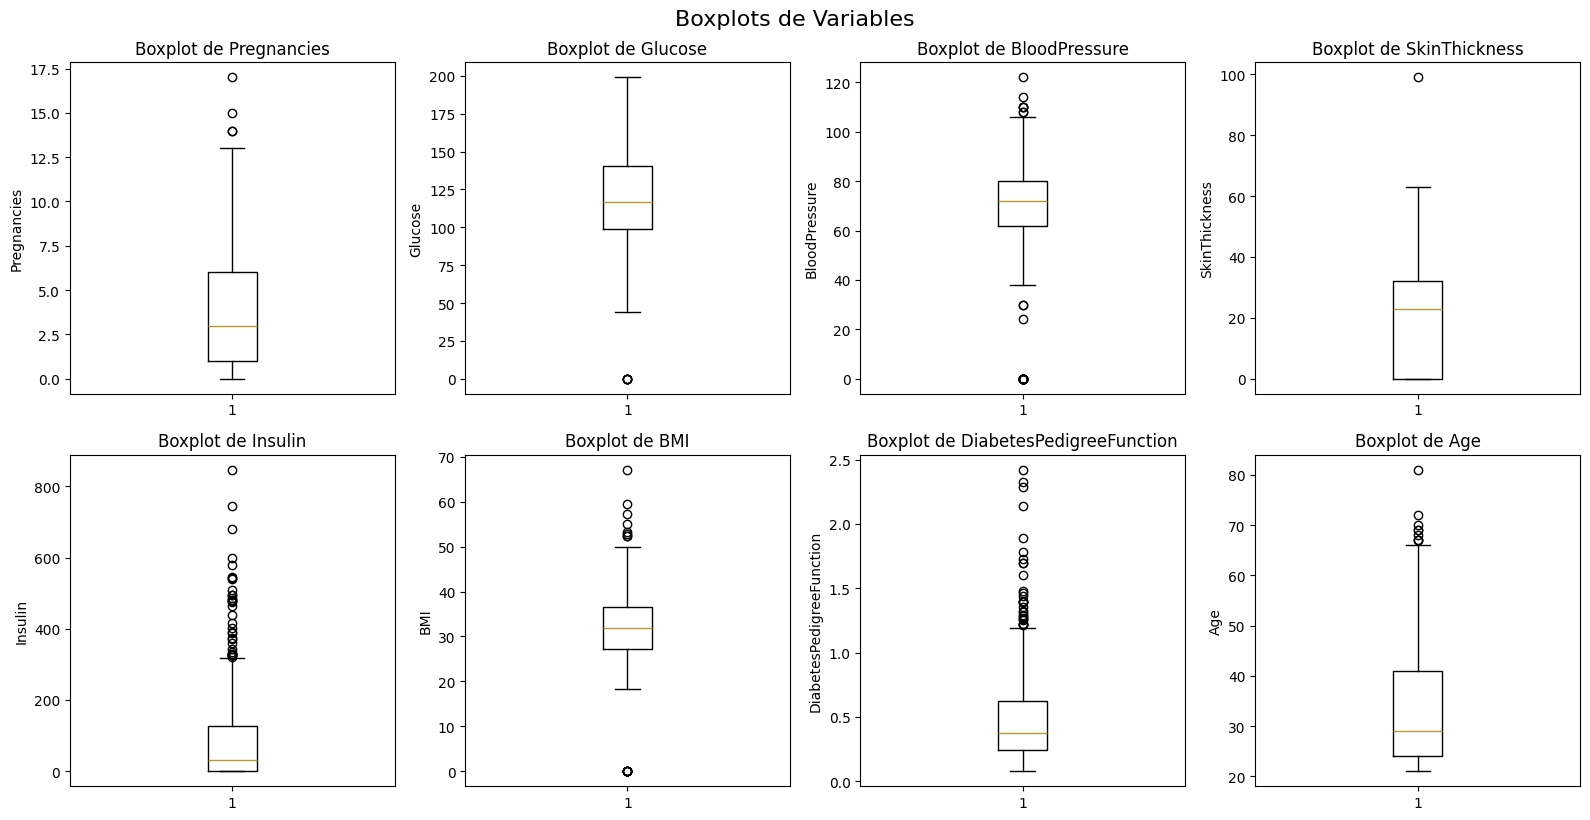

Generando matriz de correlación...


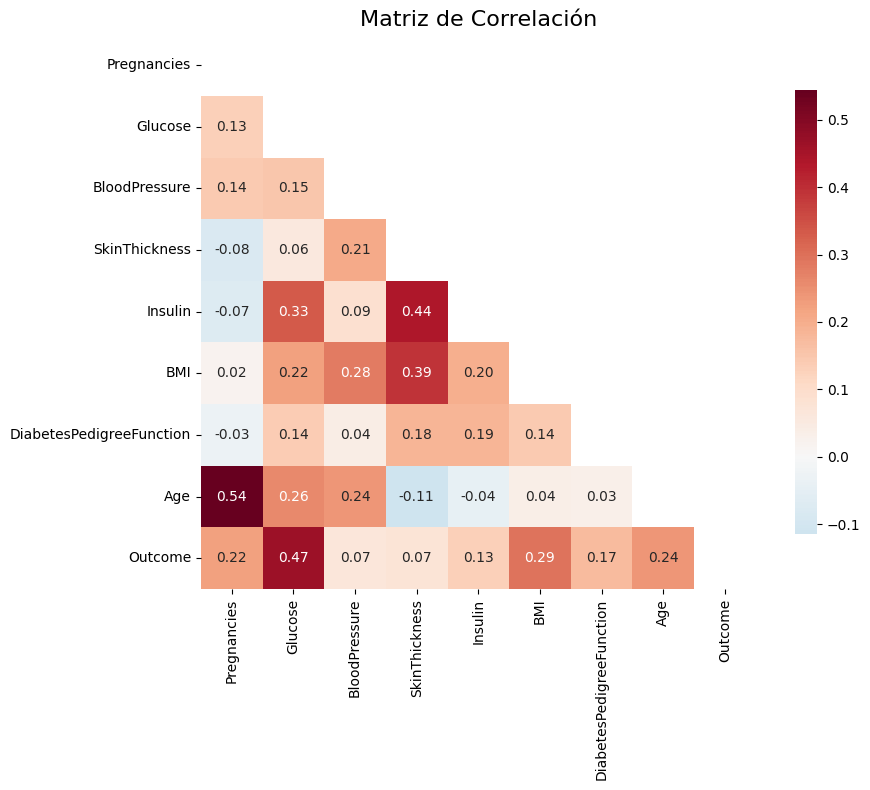

In [9]:
# 6. VISUALIZACIONES
print("\n\n6. GENERANDO VISUALIZACIONES...")
print("-" * 40)

# Configurar el estilo de las gráficas
plt.rcParams['figure.figsize'] = (15, 12)

# 6.1 Histogramas
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    if col != 'Outcome':
        axes[i].hist(df[col], bins=20, alpha=0.7, edgecolor='black')
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

# Gráfico de barras para Outcome
axes[8].bar(conteo_clases.index, conteo_clases.values, color=['skyblue', 'lightcoral'])
axes[8].set_title('Distribución de Outcome')
axes[8].set_xlabel('Outcome')
axes[8].set_ylabel('Frecuencia')
axes[8].set_xticks([0, 1])
axes[8].set_xticklabels(['No Diabetes', 'Diabetes'])

plt.tight_layout()
plt.suptitle('Histogramas de Variables', fontsize=16, y=1.02)
plt.show()

# 6.2 Boxplots
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.ravel()

for i, col in enumerate(df.columns[:-1]):  # Excluir 'Outcome'
    axes[i].boxplot(df[col])
    axes[i].set_title(f'Boxplot de {col}')
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.suptitle('Boxplots de Variables', fontsize=16, y=1.02)
plt.show()

# 6.3 Matriz de correlación
print("Generando matriz de correlación...")
correlacion = df.corr()

plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlacion, dtype=bool))
sns.heatmap(correlacion, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            mask=mask,
            square=True,
            fmt='.2f',
            cbar_kws={"shrink": .8})
plt.title('Matriz de Correlación', fontsize=16)
plt.tight_layout()
plt.show()

